In [7]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../src/')
from models.unet_model import UNet

In [10]:
config = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "checkpoint_path": "../checkpoints/full/256_mse/best_checkpoint.pth"
}

# Load the model
model = UNet(n_channels=3, n_classes=3, bilinear=False)
checkpoint = torch.load(config["checkpoint_path"], map_location=config["device"])
model.load_state_dict(checkpoint['state_dict'])
model.to(config["device"])
model.eval()

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [11]:
def process_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0).to(config["device"])

In [15]:
image_path = "../data/test/brian_picture_cropped.jpg"
image = process_image(image_path)

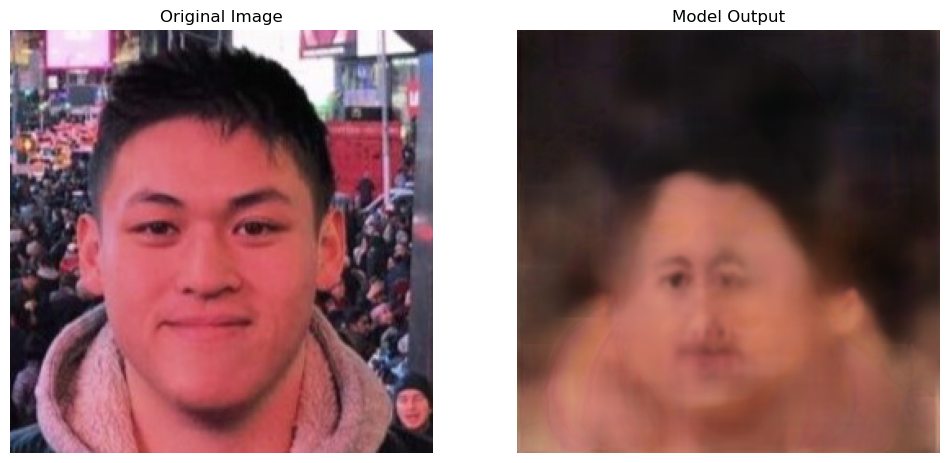

In [16]:
with torch.no_grad():
    output = model(image)

output_image = transforms.ToPILImage()(output.squeeze().cpu())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(image_path))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Model Output")
plt.axis('off')

plt.show()